In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mailbox

In [4]:
# Load the dataset file path

mboxfile = "mymail.mbox"
mbox = mailbox.mbox(mboxfile)
mbox


In [5]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
sender
Bounces_to
Received
Message-Id
To
Precedence
List-Unsubscribe
Date
Reply-To
Content-Type
MIME-Version
X-SG-EID
X-SG-ID
X-Feedback-ID
8APGLX26A5GIP6D5AYI4=
X-DBWVSPP33H9Z066ED566
Subject
From


In [6]:
import csv

In [7]:
with open('mailbox.csv', 'w', encoding = "utf-8") as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])
    
  for message in mbox:
    writer.writerow([message['subject'], 
                     message['from'],  
                     message['date'], 
                     message['to'],  
                     message['X-Gmail-Labels'], 
                     message['X-GM-THRID']])

In [8]:
# reading the csv file

df = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [9]:
# to check the data type of the columns
df.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [10]:
# change the datatype of date to Date time argument.

df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

C:\Users\HP-PC\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\HP-PC\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [15]:
# remove nan value from the dataset

df = df[df['date'].notna()]

In [16]:
# save the current csv into a new csv file

df.to_csv('gmail.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18571 entries, 1 to 18577
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  18545 non-null  object             
 1   from     18571 non-null  object             
 2   date     18571 non-null  datetime64[ns, UTC]
 3   to       18552 non-null  object             
 4   label    18571 non-null  object             
 5   thread   18571 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1015.6+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18571 entries, 1 to 18577
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  18545 non-null  object             
 1   from     18571 non-null  object             
 2   date     18571 non-null  datetime64[ns, UTC]
 3   to       18552 non-null  object             
 4   label    18571 non-null  object             
 5   thread   18571 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1015.6+ KB


In [18]:
# okay, let's read the first 10 entries in our data.

df.head(10)

,subject,from,date,to,label,thread
1,"(1) Last reminder: please respond immediately,...","""Check Your Account ���"" <LMNK6KN51OEVKR@LMNK6...",2020-10-30 16:21:36+00:00,NaN,"Spam,Category promotions,Unread",1682063264930640201
2,Do you want to bet that I'm more horny than yo...,bludog1000 <from@tradearray.com>,2020-10-30 16:31:24+00:00,Sernieui <utility4all@gmail.com>,"Spam,Category updates,Unread",1681995056030790761
3,"=?utf-8?Q?All_treat,_no_trick._You=E2=80=99ll_...",MoreNiche Support <support@moreniche.com>,2020-10-30 20:11:13+00:00,utility4all@gmail.com,"Inbox,Category updates,Unread",1682008887354895714
4,=?UTF-8?B?8J+OgiBBd29wZWp1IFN1bGl5?=\r\n =?UTF...,"""Facebook"" <notification@facebookmail.com>",2020-11-02 04:16:53+00:00,Aremo Olacares <utility4all@gmail.com>,"Inbox,Category social,Unread",1682220645419387519
5,=?utf-8?Q?Ride_the_wave!_=F0=9F=8C=8A?=,"""Ryan Deiss"" <members@digitalmarketer.com>",2020-11-01 12:18:20+00:00,"""Lawal Abubakar"" <utility4all@gmail.com>","Inbox,Category updates,Unread",1682169116635501891
6,Your Weekly Digest of New Names,"""BrandBucket"" <sales@brandbucket.com>",2020-10-30 11:00:48+00:00,"""Lawal Babatunde"" <utility4all@gmail.com>","Inbox,Category promotions,Unread",1681974817985926449
7,Bolanle Ajiboye confirmed your Facebook friend...,"""Facebook"" <notification@facebookmail.com>",2020-10-30 14:08:19+00:00,Aremo Olacares <utility4all@gmail.com>,"Inbox,Category social,Unread",1681986056857835870
8,=?utf-8?q?=F0=9F=91=8B_Hi_Lawal_Abubakar_Babat...,"""Duolingo"" <hello@duolingo.com>",2020-11-02 06:03:55+00:00,Utility4all@gmail.com,"Inbox,Category updates,Unread",1682227368607281094
9,=?utf-8?Q?I=E2=80=99m_raising_T&C_2020_tickets...,"""Ryan Deiss"" <members@digitalmarketer.com>",2020-10-27 00:03:13+00:00,"""Lawal Abubakar"" <utility4all@gmail.com>","Inbox,Category updates,Unread",1681661876148612400
10,=?utf-8?q?Here_is_what_you_missed_last_week_=2...,Binance <do_not_reply@mailer6.binance.com>,2020-10-26 10:54:56+00:00,utility4all@gmail.com,"Inbox,Category updates,Unread",1681611647202242378


In [19]:
df.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [20]:
# extract only email address from 'from' field. 

import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [21]:
# apply the function to the from field.

df['from'] = df['from'].apply(lambda x: extract_email_ID(x))

In [22]:
# differentiate sent email from received email

myemail = 'utility4all@gmail.com'
df['label'] = df['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [23]:
# dropping the to columns

df.drop(columns='to', inplace=True)

In [24]:
df.head(10)

,subject,from,date,label,thread
1,"(1) Last reminder: please respond immediately,...",LMNK6KN51OEVKR@LMNK6KN51OEVKR.edu,2020-10-30 16:21:36+00:00,inbox,1682063264930640201
2,Do you want to bet that I'm more horny than yo...,from@tradearray.com,2020-10-30 16:31:24+00:00,inbox,1681995056030790761
3,"=?utf-8?Q?All_treat,_no_trick._You=E2=80=99ll_...",support@moreniche.com,2020-10-30 20:11:13+00:00,inbox,1682008887354895714
4,=?UTF-8?B?8J+OgiBBd29wZWp1IFN1bGl5?=\r\n =?UTF...,notification@facebookmail.com,2020-11-02 04:16:53+00:00,inbox,1682220645419387519
5,=?utf-8?Q?Ride_the_wave!_=F0=9F=8C=8A?=,members@digitalmarketer.com,2020-11-01 12:18:20+00:00,inbox,1682169116635501891
6,Your Weekly Digest of New Names,sales@brandbucket.com,2020-10-30 11:00:48+00:00,inbox,1681974817985926449
7,Bolanle Ajiboye confirmed your Facebook friend...,notification@facebookmail.com,2020-10-30 14:08:19+00:00,inbox,1681986056857835870
8,=?utf-8?q?=F0=9F=91=8B_Hi_Lawal_Abubakar_Babat...,hello@duolingo.com,2020-11-02 06:03:55+00:00,inbox,1682227368607281094
9,=?utf-8?Q?I=E2=80=99m_raising_T&C_2020_tickets...,members@digitalmarketer.com,2020-10-27 00:03:13+00:00,inbox,1681661876148612400
10,=?utf-8?q?Here_is_what_you_missed_last_week_=2...,do_not_reply@mailer6.binance.com,2020-10-26 10:54:56+00:00,inbox,1681611647202242378


In [25]:
# refactor the timezone

import datetime 
import pytz

def refactor_timezone(x):
  est = pytz.timezone('Africa/Lagos')
  return x.astimezone(est)

In [26]:
# renaming the factor created

df['date'] = df['date'].apply(lambda x: refactor_timezone(x))

In [27]:
# convert the day of the week variable into the name of the day

df['dayofweek'] = df['date'].apply(lambda x: x.day_name)
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [28]:
# do the same process for the time of the day.

df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [29]:
# refactor the hour, the year integer, and the year fraction, respectively.

df['hour'] = df['date'].apply(lambda x: x.hour)

In [30]:
# Refactor the year integer

df['year_int'] = df['date'].apply(lambda x: x.year)

In [31]:
# refactor the year fraction

df['year'] = df['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [32]:
# set the date to index

df.index = df['date']
del df['date']

In [33]:
# checking the number of email sent in a given period

print(df.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(df['label'].value_counts())

Wed, 10 Jul 2013 03:23 PM
Mon, 02 Nov 2020 04:29 PM
inbox    18221
sent       350
Name: label, dtype: int64


In [34]:
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [35]:
# At what times of the day do I send and receive emails with Gmail?

def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('Africa/Lagos')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [36]:
# create different dataset for sent and received

sent = df[df['label']=='sent']
received = df[df['label']=='inbox']

<ipython-input-35-38f31cee3397>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<AxesSubplot:title={'center':'Received'}>

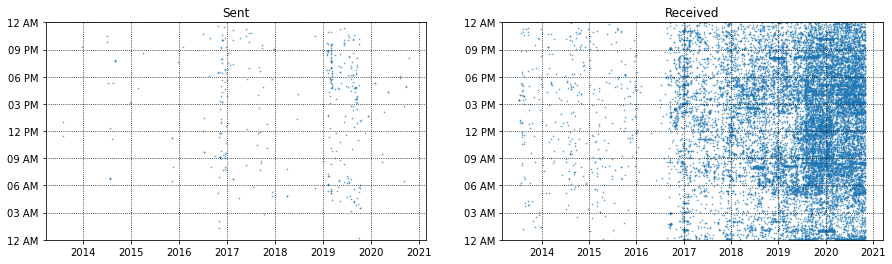

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [38]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [39]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [40]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

<ipython-input-35-38f31cee3397>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-39-99d4591ab3fd>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


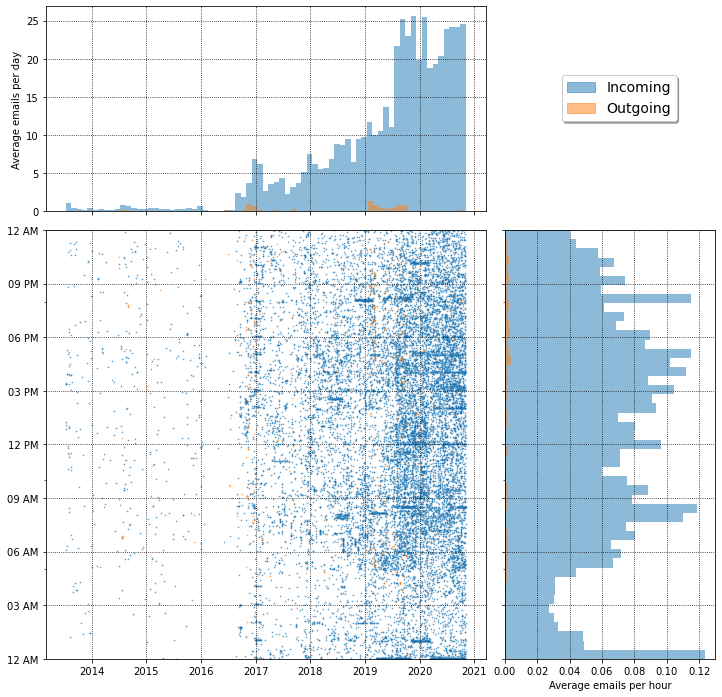

In [41]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

<AxesSubplot:>

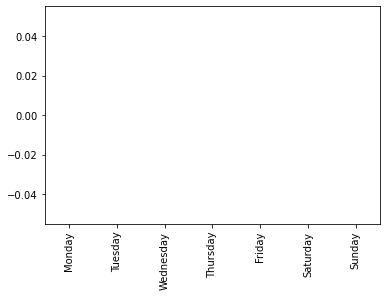

In [42]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [43]:
addrs = received['from'].value_counts()

addrs[0:20]

notification@facebookmail.com    1913
no-reply@e.udemymail.com         1514
admin@armanitalks.com             561
support@bitmex.com                481
udemy@email.udemy.com             442
do-not-reply@post.binance.com     429
noreply@medium.com                413
waju@cabalfood.com                394
digest-noreply@quora.com          379
matt@rizvipublishing.com          369
info@iiema.org                    363
support@remitano.com              356
no-reply@m.mail.coursera.org      298
info@searchenginejournal.com      289
avaaz@avaaz.org                   234
mailer@bittrex.com                221
notify@wemabank.com               214
members@digitalmarketer.com       212
surveys@vindale.com               196
noreply@nairaland.com             190
Name: from, dtype: int64

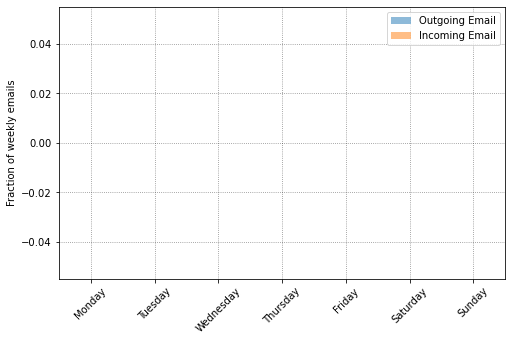

In [51]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

<ipython-input-35-38f31cee3397>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-39-99d4591ab3fd>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


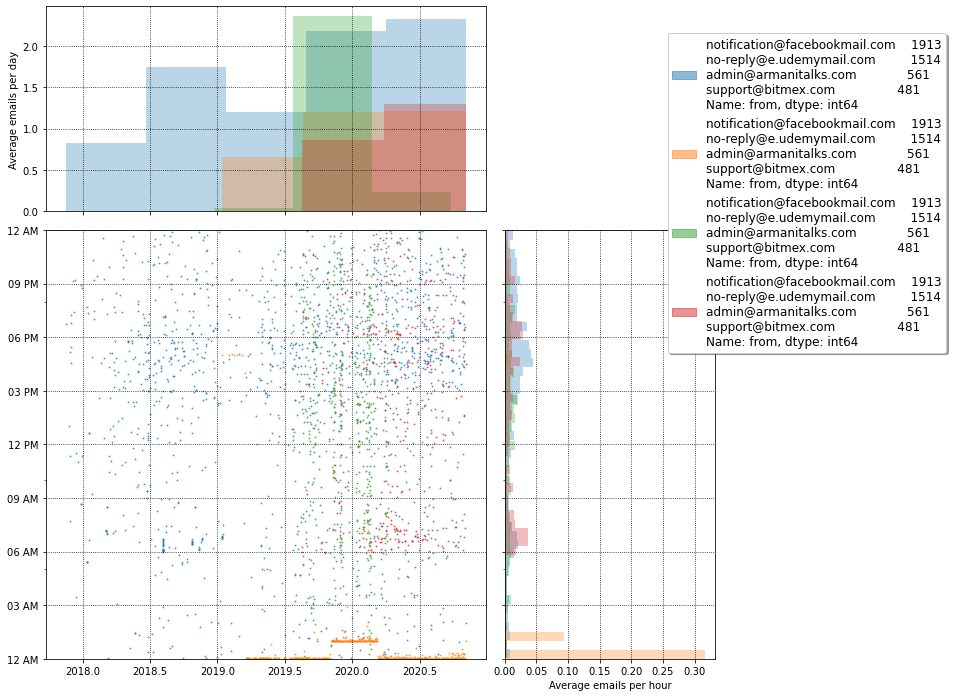

In [54]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(df[df['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

In [48]:
df.dayofweek.head

<bound method NDFrame.head of date
2020-10-30 17:21:36+01:00    NaN
2020-10-30 17:31:24+01:00    NaN
2020-10-30 21:11:13+01:00    NaN
2020-11-02 05:16:53+01:00    NaN
2020-11-01 13:18:20+01:00    NaN
                            ... 
2020-08-13 18:03:06+01:00    NaN
2020-10-02 10:07:49+01:00    NaN
2020-08-21 09:54:10+01:00    NaN
2020-10-29 09:24:07+01:00    NaN
2020-04-28 21:27:32+01:00    NaN
Name: dayofweek, Length: 18571, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']>

<AxesSubplot:>

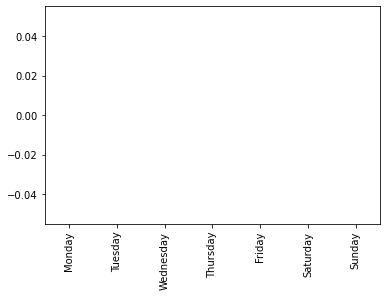

In [47]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')


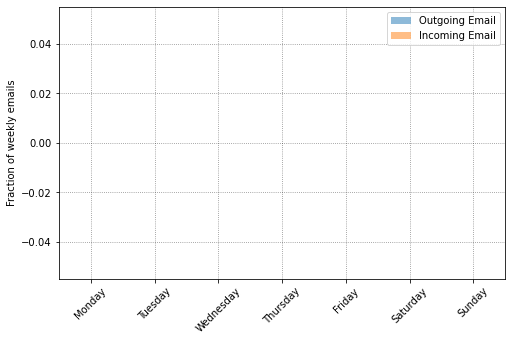

In [57]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

In [59]:
pip install wordcloud

In [61]:
from wordcloud import WordCloud 

df_no_arxiv = df[df['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

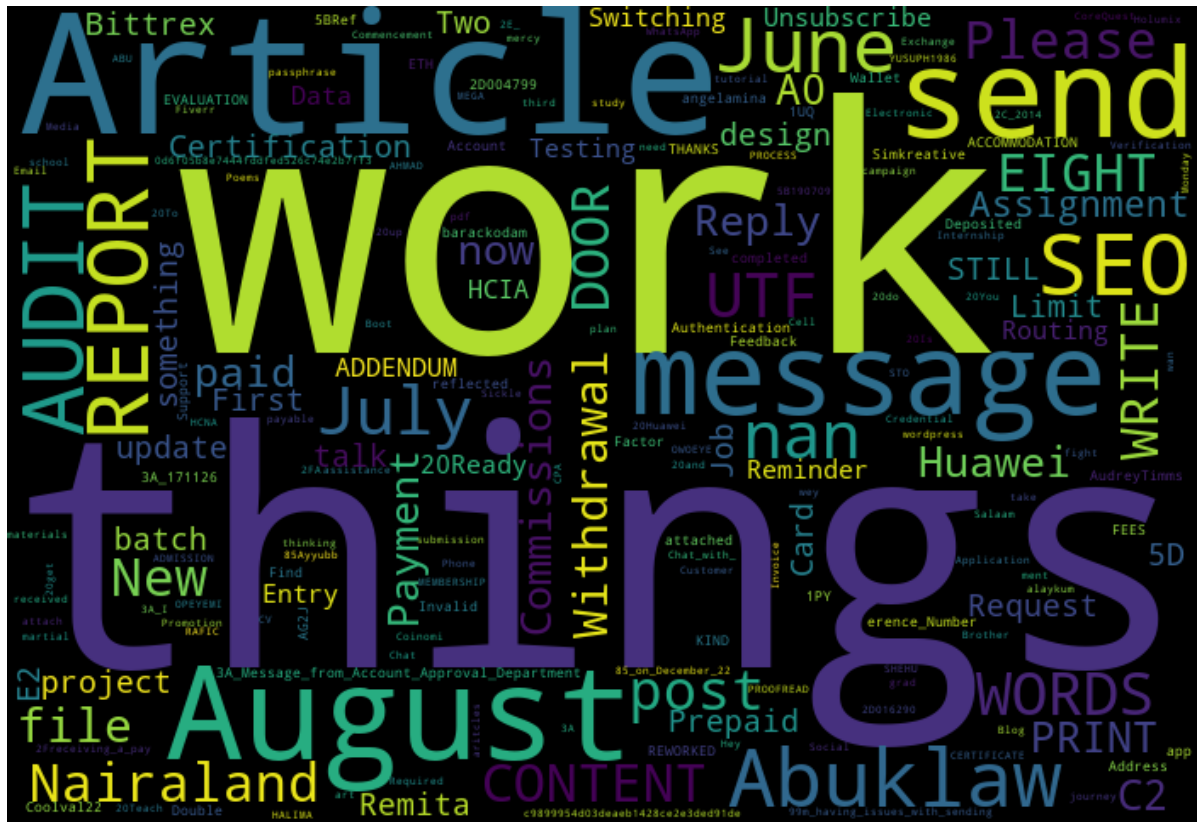

In [62]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)